<a href="https://colab.research.google.com/github/TariqAlhathloul/Text_Classification/blob/main/Task2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

# Install and Import Needed Libraries

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download the Dataset

In [232]:
# !kaggle datasets download -d khaledzsa/spam-messages
# !unzip spam-messages.zip

In [233]:
df = pd.read_csv('/content/spam.csv')

In [234]:
df.shape

(5572, 2)

# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

## Inspecting the Data

In [235]:
df.head(10)

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5572 non-null   object
 1   label   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## check for missing values

In [237]:
df.isnull().sum()

,0
text,0
label,0


## Distribution of Labels

<Axes: xlabel='label'>

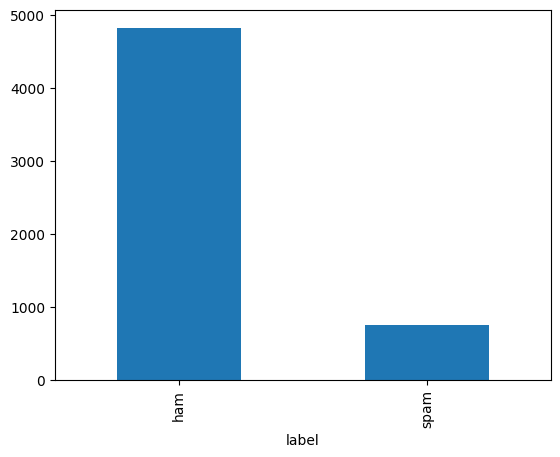

In [238]:
df['label'].value_counts().plot(kind='bar')
# the labels are imbalanced since we only have 747 spam, and 4825 ham messages

##  histogram of text lengths to visualize the distribution

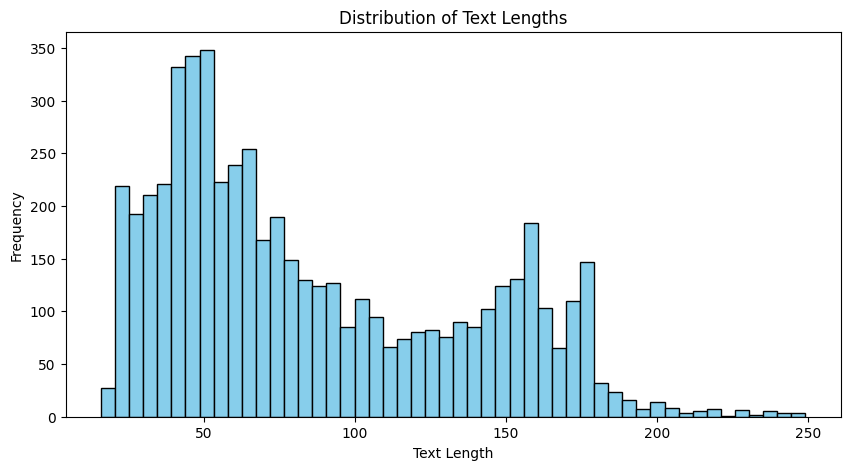

In [278]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 5))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:  
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:  
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **English stopwords loading**:  
   We load a list of English stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:  
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   
   - **Removing links (URLs)**:  
     Any URLs present in the text are removed as they are not meaningful for classification purposes.
   
   - **Removing special characters and punctuation**:  
     This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   
   - **Lowercasing**:  
     All text is converted to lowercase for uniformity and to avoid case sensitivity issues.
   
   - **Removing English stopwords**:  
     Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   
   - **Stemming or Lemmatization**:  
     Either stemming or lemmatization is applied to reduce words to their root or base form, ensuring consistency in word forms.

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

## remove missing values

In [239]:
df.dropna(inplace=True)

## filter by text length i will choose maximum 250 characters and minimum 10 characters

In [240]:
df.shape

(5572, 2)

In [241]:
text_lengths = df['text'].str.len()

print("Maximum text length:", text_lengths.max())
print("Minimum text length:", text_lengths.min())
print("number of texts above 250 character", (text_lengths > 250).sum())
print("number of texts below 10 character", (text_lengths < 15).sum())

Maximum text length: 910
Minimum text length: 2
number of texts above 250 character 75
number of texts below 10 character 47


In [242]:
print(df[df['text'].str.len() < 15]) # it's seems really not usful we will delete it

                text label
286             Ok..   ham
450    hanks lotsly!   ham
782         Beerage?   ham
959          Where @   ham
990     26th OF JULY   ham
1190   We're done...   ham
1194   Ok... C ya...   ham
1272           Ok...   ham
1318           Ok...   ham
1449   say thanks2.    ham
1482           Ok...   ham
1611             645   ham
1681          Y lei?   ham
1924              Ok   ham
2087   \alright babe   ham
2321           Ok...   ham
2324         Ok lor.   ham
2469  * Am on my way   ham
2620       How come?   ham
2622       Ok lor...   ham
2659           Ok...   ham
2717  Okie.. Thanx..   ham
2720       Ok lor...   ham
2906          ALRITE   ham
2927     Anything...   ham
3205   At home also.   ham
3212  What's ur pin?   ham
3374             :)    ham
3392     Ok thanx...   ham
3613   Ok c Ì_ then.   ham
3831             Ok.   ham
3899            Okie   ham
3971   WOT U UP 2 J?   ham
4012             Ok.   ham
4242         Okie...   ham
4496              Ok   ham
4

In [243]:
df = df[(df['text'].str.len() > 15) & (df['text'].str.len() <= 250)]

In [244]:
df.shape

(5444, 2)

## Clean the text

In [245]:
import re
from string import punctuation
def clean_text(text):
  """
  1- lowercasing
  2- Removing links (URLs):
  3- Removing special characters and punctuation
  """
  text = str(text).lower()
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'[%s]' % re.escape(punctuation), '', text)
  return text


In [246]:
df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x))

In [247]:
df.head(10)

,text,label,cleaned_text
0,"Go until jurong point, crazy.. Available only ...",ham,go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,ham,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah i dont think he goes to usf he lives aroun...
5,FreeMsg Hey there darling it's been 3 week's n...,spam,freemsg hey there darling its been 3 weeks now...
6,Even my brother is not like to speak with me. ...,ham,even my brother is not like to speak with me t...
7,As per your request 'Melle Melle (Oru Minnamin...,ham,as per your request melle melle oru minnaminun...
8,WINNER!! As a valued network customer you have...,spam,winner as a valued network customer you have b...
9,Had your mobile 11 months or more? U R entitle...,spam,had your mobile 11 months or more u r entitled...


## remove English stopwords

In [248]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [249]:
len(stopwords.words('english'))

179

## Removing English stopwords

In [250]:
def remove_stopwords(text):
  stop_words_list = set(stopwords.words('english'))
  words = word_tokenize(text)
  fillter_stop_words = [word for word in words if word not in stop_words_list]
  return ' '.join(fillter_stop_words)

In [251]:
df['text_no_sp'] = df['cleaned_text'].apply(lambda x: remove_stopwords(x))

In [252]:
df.sample(10)

,text,label,cleaned_text,text_no_sp
191,I'm sorry. I've joined the league of people th...,ham,im sorry ive joined the league of people that ...,im sorry ive joined league people dont keep to...
437,How long does applebees fucking take https://l...,ham,how long does applebees fucking take,long applebees fucking take
4325,That seems unnecessarily hostile,ham,that seems unnecessarily hostile,seems unnecessarily hostile
4965,URGENT! We are trying to contact U. Todays dra...,spam,urgent we are trying to contact u todays draw ...,urgent trying contact u todays draw shows å£20...
3098,Ok... I din get ur msg...,ham,ok i din get ur msg,ok din get ur msg
4949,Hi its me you are probably having too much fun...,ham,hi its me you are probably having too much fun...,hi probably much fun get message thought id tx...
5460,December only! Had your mobile 11mths+? You ar...,spam,december only had your mobile 11mths you are e...,december mobile 11mths entitled update latest ...
2669,we tried to contact you re your response to ou...,spam,we tried to contact you re your response to ou...,tried contact response offer new nokia fone ca...
2060,I did. One slice and one breadstick. Lol https...,ham,i did one slice and one breadstick lol,one slice one breadstick lol
1908,Hello beautiful r u ok? I've kinda ad a row wi...,ham,hello beautiful r u ok ive kinda ad a row wiv ...,hello beautiful r u ok ive kinda ad row wiv wa...


## Lemmatization

In [253]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
lemt = WordNetLemmatizer()

# tokenize the text first
df['tokens'] = df['text_no_sp'].apply(lambda x: word_tokenize(x))
#then lemmatize
df['clean_lemmatize_text'] = df['tokens'].apply(lambda x: ' '.join([lemt.lemmatize(word) for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [254]:
df.sample(10)

,text,label,cleaned_text,text_no_sp,tokens,clean_lemmatize_text
3204,"Oh, yes, I've just been a little under the wea...",ham,oh yes ive just been a little under the weathe...,oh yes ive little weather ive kind coccooning ...,"[oh, yes, ive, little, weather, ive, kind, coc...",oh yes ive little weather ive kind coccooning ...
5200,Call Germany for only 1 pence per minute! Call...,spam,call germany for only 1 pence per minute call ...,call germany 1 pence per minute call fixed lin...,"[call, germany, 1, pence, per, minute, call, f...",call germany 1 penny per minute call fixed lin...
2031,"I noe la... U wana pei bf oso rite... K lor, o...",ham,i noe la u wana pei bf oso rite k lor other da...,noe la u wana pei bf oso rite k lor days den,"[noe, la, u, wana, pei, bf, oso, rite, k, lor,...",noe la u wana pei bf oso rite k lor day den
5344,When you guys planning on coming over?,ham,when you guys planning on coming over,guys planning coming,"[guys, planning, coming]",guy planning coming
3994,R u in this continent? https://link3.com,ham,r u in this continent,r u continent,"[r, u, continent]",r u continent
5374,Do u konw waht is rael FRIENDSHIP Im gving yuo...,ham,do u konw waht is rael friendship im gving yuo...,u konw waht rael friendship im gving yuo exmpe...,"[u, konw, waht, rael, friendship, im, gving, y...",u konw waht rael friendship im gving yuo exmpe...
1171,Got what it takes 2 take part in the WRC Rally...,spam,got what it takes 2 take part in the wrc rally...,got takes 2 take part wrc rally oz u lucozade ...,"[got, takes, 2, take, part, wrc, rally, oz, u,...",got take 2 take part wrc rally oz u lucozade e...
915,I could ask carlos if we could get more if any...,ham,i could ask carlos if we could get more if any...,could ask carlos could get anybody else chip,"[could, ask, carlos, could, get, anybody, else...",could ask carlos could get anybody else chip
4539,"Urgh, coach hot, smells of chip fat! Thanks ag...",ham,urgh coach hot smells of chip fat thanks again...,urgh coach hot smells chip fat thanks especial...,"[urgh, coach, hot, smells, chip, fat, thanks, ...",urgh coach hot smell chip fat thanks especiall...
3088,What Today-sunday..sunday is holiday..so no wo...,ham,what todaysundaysunday is holidayso no work,todaysundaysunday holidayso work,"[todaysundaysunday, holidayso, work]",todaysundaysunday holidayso work


## Common words after cleaning

[('u', 1054), ('call', 570), ('2', 451), ('im', 446), ('ur', 373), ('get', 366), ('4', 279), ('free', 272), ('go', 266), ('dont', 259)]


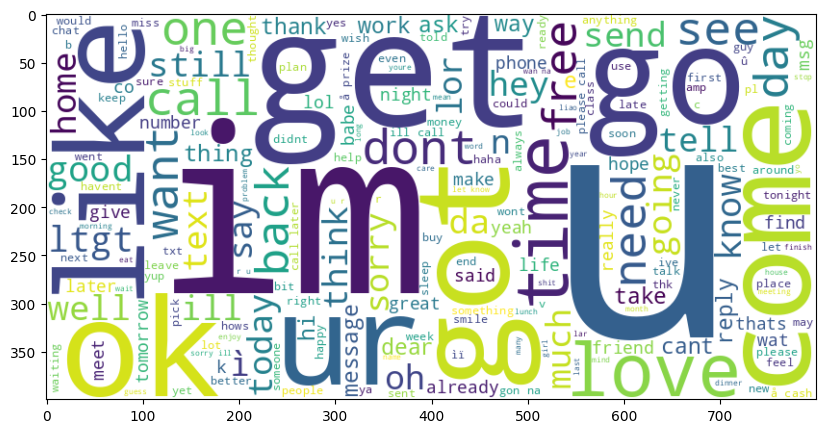

In [255]:
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(words)
top_10_words = word_freq.most_common(10)
print(top_10_words)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(' '.join(words))


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

## Tokenization

In [256]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_lemmatize_text'])
sequences = tokenizer.texts_to_sequences(df['clean_lemmatize_text'])

In [257]:
print(df['clean_lemmatize_text'][0])
print(sequences[0])

go jurong point crazy available bugis n great world la e buffet cine got amore wat
[7, 3814, 263, 567, 568, 1057, 50, 62, 264, 1058, 85, 2533, 1059, 12, 3815, 74]


## padding the sequences

In [258]:
print(df['clean_lemmatize_text'].str.len().max())

181


In [259]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(sequences, maxlen=181, padding='post', truncating='post')

In [260]:
padded_sequences.shape[1]

181

## Encoding the target varibale

In [261]:
map = {'spam':1, 'ham':0}
df['label'] = df['label'].map(map)

## split into trainin and testing
## 80, 20

In [262]:
from sklearn.model_selection import train_test_split

X = padded_sequences
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## before smote

<Axes: xlabel='label'>

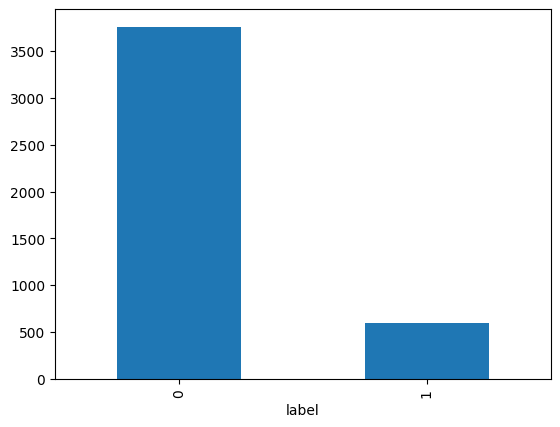

In [263]:
y_train.value_counts().plot(kind='bar')

## after smote

In [264]:
from imblearn.over_sampling import SMOTE


# oversampling the train dataset using SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


<Axes: xlabel='label'>

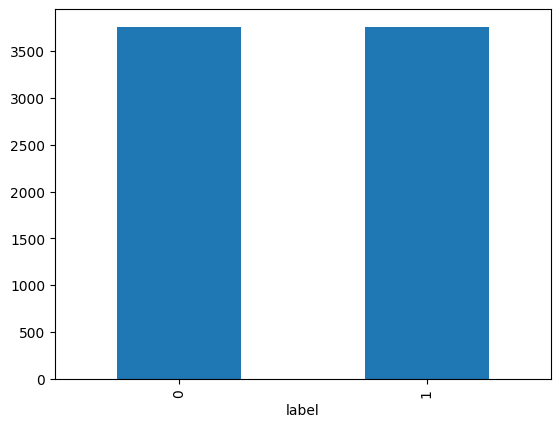

In [265]:
y_train_sm.value_counts().plot(kind='bar')

## data sape confirmation

In [266]:
print(f"X Train: {X_train.shape}")
print(f"X Test: {X_test.shape}")
print(f"y Train: {y_train.shape}")
print(f"y Test: {y_test.shape}")

X Train: (4355, 181)
X Test: (1089, 181)
y Train: (4355,)
y Test: (1089,)


# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

## params

In [267]:
max_features = len(tokenizer.word_index) + 1
embedding_dim = 64
sequence_length = padded_sequences.shape[1]
EPOCHS = 20
BATCH_SIZE = 32

In [268]:
padded_sequences.shape[1]

181

In [269]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, GlobalAvgPool2D, Dense, LSTM

In [270]:
model = tf.keras.models.Sequential([
  #input layer
  layers.Input(shape=(sequence_length,)),
  #embedding layer
  layers.Embedding(max_features, embedding_dim),
  #dropout
  layers.Dropout(0.2),
  #LSTM layers
  layers.Bidirectional(LSTM(32, return_sequences=True)),
  layers.Bidirectional(LSTM(32)),
  #dropout
  layers.Dropout(0.2),
  #hidden dense layer
  layers.Dense(32, activation='relu'),
  # Binary classification
  layers.Dense(1, activation='sigmoid')])

## model summary

In [271]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 181, 64)             │         541,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 181, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_16 (Bidirectional)     │ (None, 181, 64)             │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_17 (Bidirectional)     │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 593,537 (2.26 MB)

 Trainable params: 593,537 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

## model compilation

In [272]:
model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

call backs

In [273]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint(filepath='spam_classifier_best_model.keras', monitor='val_loss', save_best_only=True)
]

## fitting the model

In [274]:
# history = model.fit(
# X_train,
# y_train,
#  epochs=EPOCHS,
#  validation_data=(X_test, y_test)
# )

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [275]:
#create datasets from the training and testing data.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
#batching the Datasets
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

#fitting
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=test_dataset,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 63s 398ms/step - accuracy: 0.8891 - loss: 0.3310 - val_accuracy: 0.9761 - val_loss: 0.0697
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 71s 318ms/step - accuracy: 0.9867 - loss: 0.0532 - val_accuracy: 0.9679 - val_loss: 0.0820
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 80s 307ms/step - accuracy: 0.9965 - loss: 0.0147 - val_accuracy: 0.9835 - val_loss: 0.0628
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 81s 298ms/step - accuracy: 0.9992 - loss: 0.0048 - val_accuracy: 0.9807 - val_loss: 0.0633
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9780 - val_loss: 0.0802
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 49s 355ms/step - accuracy: 1.0000 - loss: 4.6675e-04 - val_accuracy: 0.9826 - val_loss: 0.0782
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 296ms/step - accuracy: 1.0000 - loss: 1.6598e-04 - val_accuracy: 0.9862 - val_loss: 0.0812
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 296ms/step - accuracy: 1.0000 -

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

## evaluate on train set

In [281]:
loss, acc = model.evaluate(X_train, y_train)
print(f"Accuracy: {acc}")
print(f"Loss: {loss:}")
#ValueError: Cannot take the length of shape with unknown rank.

ValueError: Cannot take the length of shape with unknown rank.

## evaluate on test set

In [279]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc:.3f}")
print(f"Loss: {loss:.3f}")

ValueError: Cannot take the length of shape with unknown rank.

## loss and accurcy curve

In [ ]:
history.history.keys()

In [ ]:
history_dict = history.history

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']


loss = history_dict['loss']
val_loss = history_dict['val_loss']


plt.figure(figsize=(12, 6))

# plot accuracy
plt.subplot(1, 2, 1)
plt.plot(acc, 'bo', label='Training Accuracy')
plt.plot(val_acc,'b' ,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1])  # range from 0 to 1

# plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, 'b', label='Training Loss')
plt.plot(val_loss,'bo', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

## test sample

# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?


- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here: